In [156]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [157]:
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.compose import make_column_transformer
from sklearn.semi_supervised import LabelSpreading
from sklearn.svm import SVC

# About Dataset

### Description

This dataset contains statistics on the world's billionaires, including information about their businesses, industries, and personal details. It provides insights into the wealth distribution, business sectors, and demographics of billionaires worldwide.

### Key Features

* <b>rank:</b> The ranking of the billionaire in terms of wealth.* <b>finalWorth:</b> The final net worth of the billionaire in U.S. dollars.
* <b>category:</b> The category or industry in which the billionaire's business operates.
* <b>personName:</b> The full name of the billionaire.
* <b>age:</b> The age of the billionaire.
* <b>country:</b> The country in which the billionaire resides.
* <b>city:</b> The city in which the billionaire resides.
* <b>
source</b>: The source of the billionaire's wealth
* <b>
industrie</b>s: The industries associated with the billionaire's business interest
* <b>countryOfCitizenship:</b> The country of citizenship of the billionaire.
* <b>
organization</b>: The name of the organization or company associated with the billionaire
* <b>selfMade:</b> Indicates whether the billionaire is self-made (True/False).
* <b>status:</b> "D" represents self-made billionaires (Founders/Entrepreneurs) and "U" indicates inherited or unearned wealth.
* <b>gender:</b> The gender of the billionaire.
* <b>
birthDate</b>: The birthdate of the billionaire
* <b>lastName:</b> The last name of the billionaire.
* <b>firstName:</b> The first name of the billionaire.
* <b>title:</b> The title or honorific of the billionaire.
* <b>date:</b> The date of data collection.
* <b>state:</b> The state in which the billionaire resides.
* <b>residenceStateRegion:</b> The region or state of residence of the billionaire.
* <b>birthYear:</b> The birth year of the billionaire.
* <b>birthMonth:</b> The birth month of the billionaire.
* <b>birthDay:</b> The birth day of the billionaire.
* <b>cpi_country:</b> Consumer Price Index (CPI) for the billionaire's country.
* <b>cpi_change_country:</b> CPI change for the billionaire's country.
* <b>gdp_country:</b> Gross Domestic Product (GDP) for the billionaire's country.
* <b>gross_tertiary_education_enrollment:</b> Enrollment in tertiary education in the billionaire's country.
* <b>gross_primary_education_enrollment_country:</b> Enrollment in primary education in the billionaire's country.
* <b>life_expectancy_country:</b> Life expectancy in the billionaire's country.
* <b>tax_revenue_country_country:</b> Tax revenue in the billionaire's country.
* <b>total_tax_rate_country:</b> Total tax rate in the billionaire's country.
* <b>population_country:</b> Population of the billionaire's country.
* <b>latitude_country:</b> Latitude coordinate of the billionaire's country.
* <b>longitude_country:</b> Longitude coordinate of the billionaire's country.

### Prediction:

1. Self-made vs. inherited wealth prediction
   * Target Variable: selfMade











.th.s.








## Reading the dataset

In [158]:
# Load the Billionaires Statistics Dataset CSV file into a DataFrame
# 'billionaires_statistics_df' will contain the data from the CSV file
billionaires_statistics_df = pd.read_csv("Billionaires Statistics Dataset.csv")

## Basic Exploration of the dataset

In [159]:
# Display the shape of the DataFrame
# This will show the number of rows and columns in the dataset
print(billionaires_statistics_df.shape)

(2640, 35)


In [160]:
# Display the first few rows of the DataFrame to verify the data has been loaded correctly
billionaires_statistics_df.head()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


In [161]:
# Display concise summary of the DataFrame
# This will show information about the DataFrame including the number of non-null entries in each column
billionaires_statistics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 35 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rank                                        2640 non-null   int64  
 1   finalWorth                                  2640 non-null   int64  
 2   category                                    2640 non-null   object 
 3   personName                                  2640 non-null   object 
 4   age                                         2575 non-null   float64
 5   country                                     2602 non-null   object 
 6   city                                        2568 non-null   object 
 7   source                                      2640 non-null   object 
 8   industries                                  2640 non-null   object 
 9   countryOfCitizenship                        2640 non-null   object 
 10  organization

In [162]:
# Display descriptive statistics of the DataFrame
# This will show summary statistics for numerical columns, such as count, mean, std, min, 25%, 50%, 75%, and max
billionaires_statistics_df.describe()

,rank,finalWorth,age,birthYear,birthMonth,birthDay,cpi_country,cpi_change_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
count,2640.000000,2640.000000,2575.000000,2564.000000,2564.000000,2564.000000,2456.000000,2456.000000,2458.000000,2459.000000,2458.000000,2457.000000,2458.000000,2.476000e+03,2476.000000,2476.000000
mean,1289.159091,4623.787879,65.140194,1957.183307,5.740250,12.099844,127.755204,4.364169,67.225671,102.858520,78.122823,12.546235,43.963344,5.102053e+08,34.903592,12.583156
std,739.693726,9834.240939,13.258098,13.282516,3.710085,9.918876,26.452951,3.623763,21.343426,4.710977,3.730099,5.368625,12.145296,5.542447e+08,17.003497,86.762989
min,1.000000,1000.000000,18.000000,1921.000000,1.000000,1.000000,99.550000,-1.900000,4.000000,84.700000,54.300000,0.100000,9.900000,3.801900e+04,-40.900557,-106.346771
25%,659.000000,1500.000000,56.000000,1948.000000,2.000000,1.000000,117.240000,1.700000,50.600000,100.200000,77.000000,9.600000,36.600000,6.683440e+07,35.861660,-95.712891
50%,1312.000000,2300.000000,65.000000,1957.000000,6.000000,11.000000,117.240000,2.900000,65.600000,101.800000,78.500000,9.600000,41.200000,3.282395e+08,37.090240,10.451526
75%,1905.000000,4200.000000,75.000000,1966.000000,9.000000,21.000000,125.080000,7.500000,88.200000,102.600000,80.900000,12.800000,59.100000,1.366418e+09,40.463667,104.195397
max,2540.000000,211000.000000,101.000000,2004.000000,12.000000,31.000000,288.570000,53.500000,136.600000,142.100000,84.200000,37.200000,106.300000,1.397715e+09,61.924110,174.885971


* rank:
Ranks range from 1 to 2540, with a mean rank of around 1289, indicating a nearly uniform distribution of ranks.

* finalWorth:
The net worth of billionaires varies widely, from 1000 million to 211000 million USD. The high standard deviation shows significant disparity in wealth.

* age:
The ages of billionaires range from 18 to 101 years, with a median age of 65, suggesting that many billionaires are older.

* birthYear, birthMonth, birthDay:
These fields provide birth details. The summary statistics here are less directly informative but can be used to derive the age or analyze birth trends.

* cpi_country and cpi_change_country:
These represent the Consumer Price Index and its change. The mean CPI is around 127.75, with changes ranging from -1.9 to 53.5.

* gross_tertiary_education_enrollment and gross_primary_education_enrollment_country:
These fields reflect education levels. For example, tertiary enrollment has a mean of 67.23%, indicating varying access to higher education.

* life_expectancy_country:
Life expectancy ranges from 54.3 to 84.2 years, with an average of 78.12 years, indicating the general health and longevity of populations in these countries.

* tax_revenue_country_country and total_tax_rate_country:
These columns reflect tax data. Tax revenue has a low mean (12.55), while total tax rate ranges widely from 9.9% to 106.3%.

In [163]:
# Finding number of null values in the dataset
billionaires_statistics_df.isnull().sum()

rank                                             0
finalWorth                                       0
category                                         0
personName                                       0
age                                             65
country                                         38
city                                            72
source                                           0
industries                                       0
countryOfCitizenship                             0
organization                                  2315
selfMade                                         0
status                                           0
gender                                           0
birthDate                                       76
lastName                                         0
firstName                                        3
title                                         2301
date                                             0
state                          

## Visual Exploration of the dataset

In [164]:
# Select only the numeric columns from the DataFrame
# 'billionaries_numeric_df' will contain only the columns with numeric data types from the original DataFrame
billionaries_numeric_df = billionaires_statistics_df.select_dtypes(include='number')

In [165]:
# Correlation of numeric columns
billionaries_numeric_df.corr()

,rank,finalWorth,age,birthYear,birthMonth,birthDay,cpi_country,cpi_change_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
rank,1.000000,-0.448930,-0.142686,0.143708,-0.042514,-0.042987,0.074872,-0.069537,-0.126277,0.005887,-0.041443,0.021576,0.123434,0.118411,-0.060056,0.185638
finalWorth,-0.448930,1.000000,0.067053,-0.066721,0.003407,0.059315,-0.042842,0.035702,0.066711,-0.008880,0.021819,-0.009270,-0.036381,-0.053024,0.031122,-0.101048
age,-0.142686,0.067053,1.000000,-0.999336,0.015322,0.081547,-0.001479,0.115669,0.061736,0.066394,0.020327,0.006429,-0.151771,-0.167812,-0.122544,-0.169338
birthYear,0.143708,-0.066721,-0.999336,1.000000,-0.045066,-0.091512,-0.000738,-0.118060,-0.061316,-0.066810,-0.017936,-0.005262,0.151297,0.167355,0.125035,0.169756
birthMonth,-0.042514,0.003407,0.015322,-0.045066,1.000000,0.221384,0.056870,0.106427,0.049269,0.026174,-0.044165,0.001484,-0.046784,-0.050506,-0.038060,-0.062697
birthDay,-0.042987,0.059315,0.081547,-0.091512,0.221384,1.000000,0.037517,0.146357,0.171608,0.045075,0.004498,0.034128,-0.149580,-0.204271,0.006617,-0.188214
cpi_country,0.074872,-0.042842,-0.001479,-0.000738,0.056870,0.037517,1.000000,0.436769,-0.456428,0.279601,-0.747716,-0.037022,0.245961,0.218303,-0.215101,0.258661
cpi_change_country,-0.069537,0.035702,0.115669,-0.118060,0.106427,0.146357,0.436769,1.000000,0.167455,0.053483,-0.393884,-0.317516,0.003272,0.066501,-0.113692,-0.470460
gross_tertiary_education_enrollment,-0.126277,0.066711,0.061736,-0.061316,0.049269,0.171608,-0.456428,0.167455,1.000000,-0.298473,0.523931,0.028123,-0.393902,-0.543031,0.122088,-0.578740
gross_primary_education_enrollment_country,0.005887,-0.008880,0.066394,-0.066810,0.026174,0.045075,0.279601,0.053483,-0.298473,1.000000,-0.306788,0.129724,0.098344,0.009805,-0.199590,-0.009239


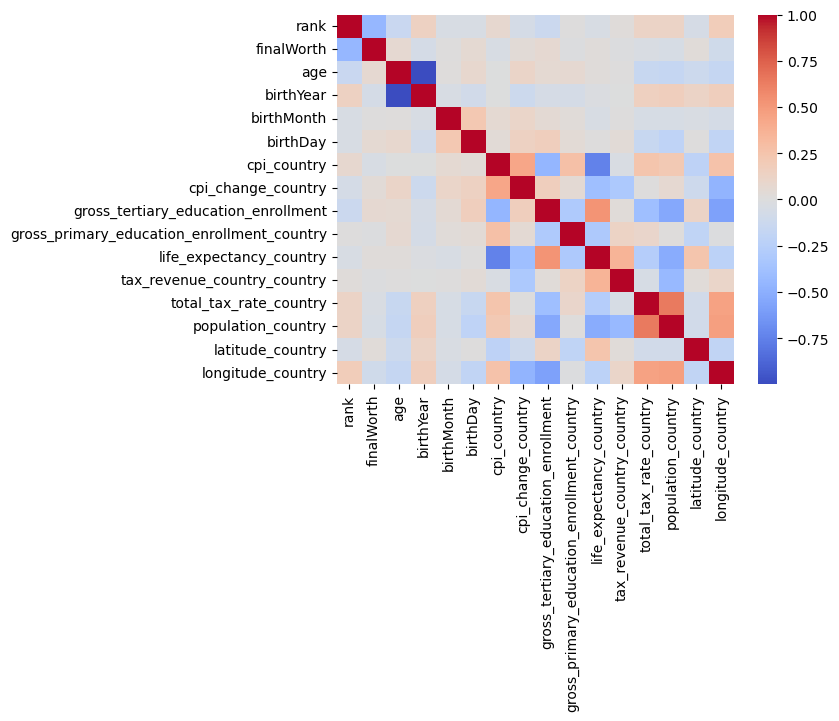

In [166]:
# Heatmap of numeric column correlation
dataplot = sns.heatmap(billionaries_numeric_df.corr(), cmap="coolwarm") 
  
# displaying heatmap 
plt.show() 

In [167]:
# No high correlation between columns

#### Exploring the distribution of billionaires' wealth across different industries, countries, and regions.

In [168]:
# Unique values of country
billionaires_statistics_df['country'].unique()

array(['France', 'United States', 'Mexico', 'India', 'Spain', 'China',
       'Canada', 'Germany', 'Switzerland', 'Belgium', 'Hong Kong',
       'Austria', 'Japan', 'United Kingdom', 'Australia', 'Indonesia',
       'United Arab Emirates', 'Russia', 'Chile', 'Monaco',
       'Czech Republic', 'Sweden', nan, 'Thailand', 'Uzbekistan',
       'Singapore', 'Nigeria', 'Israel', 'Italy', 'South Africa',
       'Brazil', 'Malaysia', 'South Korea', 'New Zealand', 'Philippines',
       'Taiwan', 'Norway', 'Egypt', 'Denmark', 'Eswatini (Swaziland)',
       'Colombia', 'Netherlands', 'Poland', 'Bahamas', 'Ukraine',
       'Cayman Islands', 'Greece', 'Turkey', 'Argentina', 'Georgia',
       'Portugal', 'Kazakhstan', 'Algeria', 'Vietnam', 'Latvia',
       'Finland', 'Bermuda', 'Luxembourg', 'British Virgin Islands',
       'Cambodia', 'Lebanon', 'Oman', 'Ireland', 'Cyprus', 'Guernsey',
       'Liechtenstein', 'Turks and Caicos Islands', 'Romania', 'Qatar',
       'Uruguay', 'Nepal', 'Slovakia', 'Mo

In [169]:
# Function to assign regions to countries
wealth_distribution_analysis_df = billionaires_statistics_df.copy()
def assign_region_v2(country):
    if country in ['France', 'Germany', 'Spain', 'Italy', 'United Kingdom', 'Switzerland', 'Belgium', 'Austria', 'Sweden', 'Netherlands', 'Poland', 'Greece', 'Portugal', 'Denmark', 'Finland', 'Ireland', 'Cyprus', 'Luxembourg', 'Liechtenstein', 'Monaco', 'Czech Republic', 'Ukraine', 'Turkey', 'Georgia', 'Romania', 'Slovakia', 'Hungary', 'Andorra']:
        return 'Europe'
    elif country in ['United States', 'Canada', 'Mexico', 'Bahamas', 'Argentina', 'Brazil', 'Chile', 'Colombia', 'Peru', 'Uruguay']:
        return 'North America'
    elif country in ['China', 'India', 'Japan', 'South Korea', 'Indonesia', 'Thailand', 'Uzbekistan', 'Singapore', 'Malaysia', 'Philippines', 'Taiwan', 'Vietnam', 'Cambodia', 'Hong Kong', 'New Zealand', 'Australia']:
        return 'Asia-Pacific'
    elif country in ['Russia', 'Israel', 'Kazakhstan', 'Turkey', 'Lebanon', 'Oman', 'United Arab Emirates', 'Qatar', 'Bahrain', 'Cyprus']:
        return 'Middle East'
    elif country in ['Nigeria', 'South Africa', 'Egypt', 'Morocco', 'Eswatini (Swaziland)', 'Tanzania']:
        return 'Africa'
    else:
        return 'Other'

wealth_distribution_analysis_df['region'] = wealth_distribution_analysis_df['country'].apply(assign_region_v2)

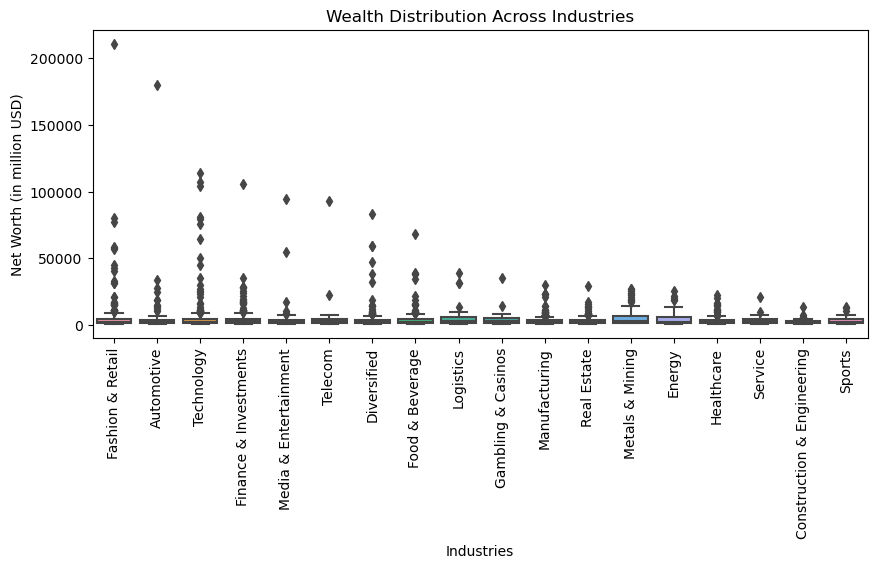

In [170]:
# Visualization for wealth distribution across industries

# Set the figure size for the plot
plt.figure(figsize=(10, 4))

# Create a boxplot to visualize the distribution of net worth across different industries
# 'wealth_distribution_analysis_df' should be a DataFrame that contains columns 'industries' and 'finalWorth'
sns.boxplot(x='industries', y='finalWorth', data=wealth_distribution_analysis_df)
plt.title('Wealth Distribution Across Industries') # Set the title of the plot
plt.xlabel('Industries') # Set the label for the x-axis
plt.ylabel('Net Worth (in million USD)') # Set the label for the y-axis
plt.xticks(rotation=90) # Rotate the x-axis labels by 90 degrees for better readability
plt.show()

* Outliers:
There are several outliers in the data, particularly in industries such as Fashion & Retail, Technology, and Finance & Investments. These outliers represent individuals with exceptionally high net worth compared to the median values of their respective industries.

* Industry Variations:
The median net worth (the horizontal line inside each box) varies significantly across industries. Some industries, such as Technology and Finance & Investments, show a higher median net worth compared to others like Service and Sports.

* Wealth Concentration:
Industries like Technology and Fashion & Retail not only have higher medians but also have a wide range of net worth values, indicating a high concentration of wealth within these sectors.
In contrast, industries such as Healthcare and Service have lower medians and smaller ranges, indicating less wealth concentration.

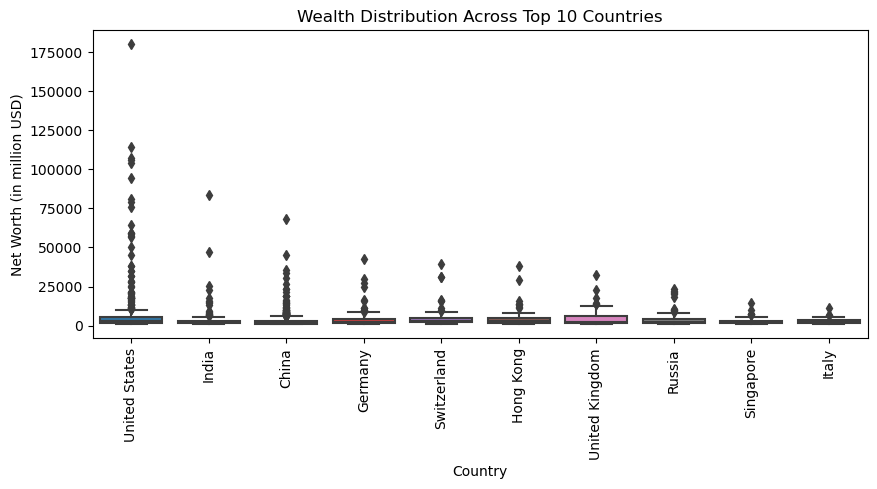

In [171]:
# Visualization for wealth distribution across countries

# Set the figure size for the plot
plt.figure(figsize=(10, 4))

# Identify the top 10 countries by the number of billionaires
# 'wealth_distribution_analysis_df' should be a DataFrame that contains columns 'country' and 'finalWorth'
top_countries = wealth_distribution_analysis_df['country'].value_counts().index[:10]

# Create a boxplot to visualize the distribution of net worth across the top 10 countries
# Filter the DataFrame to include only the rows where the 'country' is in the top 10 countries
sns.boxplot(x='country', y='finalWorth', data=wealth_distribution_analysis_df[wealth_distribution_analysis_df['country'].isin(top_countries)])
plt.title('Wealth Distribution Across Top 10 Countries') # Set the title of the plot
plt.xlabel('Country') # Set the label for the x-axis
plt.ylabel('Net Worth (in million USD)') # Set the label for the y-axis
plt.xticks(rotation=90) # Rotate the x-axis labels by 90 degrees for better readability
plt.show()

* Outliers:
There are several notable outliers, particularly in the United States, where a few individuals have exceptionally high net worths compared to the rest. Similar but less pronounced outliers can be seen in other countries like China, India, and Hong Kong.

* Median Wealth:
The United States has the highest median net worth among billionaires, followed by countries like China and Germany. The median is represented by the horizontal line within each box.

* Wealth Concentration:
The wealth distribution in the United States is significantly more spread out, indicating a higher concentration of wealth and greater inequality among its billionaires. This is evidenced by the larger number of outliers and the greater interquartile range (IQR).
Countries like Switzerland, Singapore, and Italy have a more condensed wealth distribution with fewer extreme outliers, indicating less disparity among their billionaires.

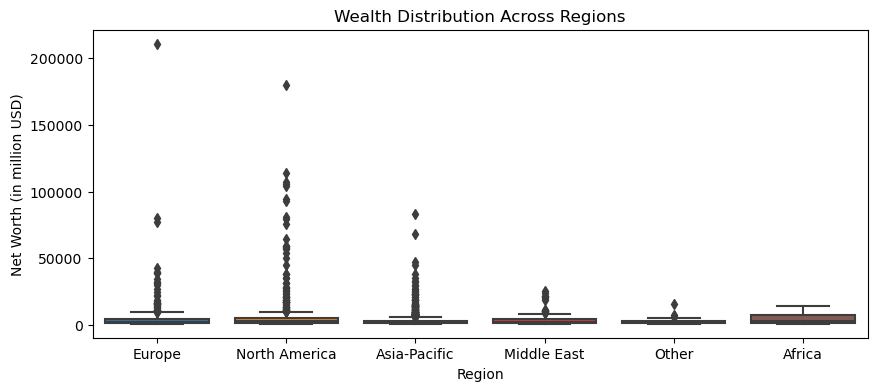

In [172]:
# Visualization for wealth distribution across regions
plt.figure(figsize=(10, 4))

# Create a boxplot to visualize the distribution of net worth across different regions
# 'wealth_distribution_analysis_df' should be a DataFrame that contains columns 'region' and 'finalWorth'
sns.boxplot(x='region', y='finalWorth', data=wealth_distribution_analysis_df)

plt.title('Wealth Distribution Across Regions') # Set the title of the plot
plt.xlabel('Region') # Set the label for the x-axis
plt.ylabel('Net Worth (in million USD)') # Set the label for the y-axis
plt.show()

* Outliers:
North America has the most significant number of outliers, with a few billionaires having exceptionally high net worths. This is followed by Europe and the Asia-Pacific region.

* Median Wealth:
The median net worth (the horizontal line within each box) varies across regions. North America has the highest median wealth, followed by Europe and the Asia-Pacific region. The Middle East, Africa, and the "Other" category have lower median net worths.

* Wealth Concentration:
North America exhibits the widest range of billionaire net worths, indicating a high concentration of wealth and significant inequality among its billionaires.
Europe and the Asia-Pacific regions also show a broad range, but less pronounced than North America.
The Middle East, Africa, and the "Other" regions have more condensed wealth distributions with fewer extreme outliers, indicating less disparity among their billionaires.

Text(0.5, 0, 'Gender')

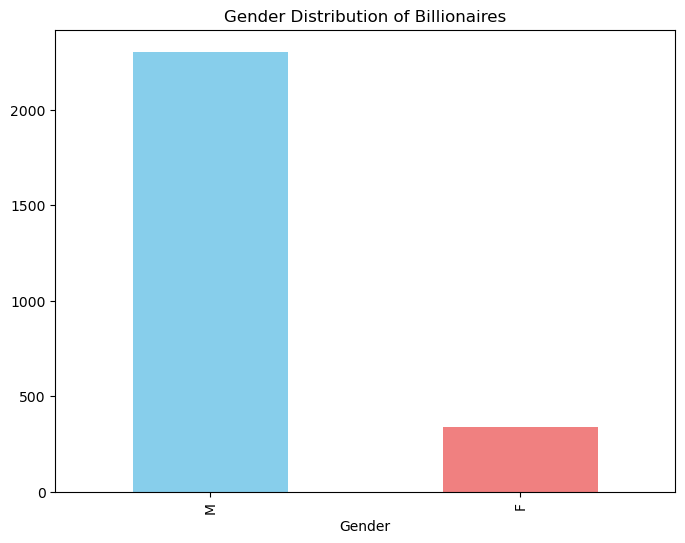

In [173]:
# Count the occurrences of each gender in the dataset
gender_counts = billionaires_statistics_df['gender'].value_counts()

plt.figure(figsize=(8, 6)) # Set the figure size for the plot

# Create a bar chart to visualize the count of each gender
gender_counts.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Gender Distribution of Billionaires') # Set the title of the plot
plt.xlabel('Gender') # Set the label for the x-axis

#### Studying correlations between billionaire wealth and economic indicators such as GDP, CPI, and tax rates.

C:\Users\MIS\AppData\Local\Temp\ipykernel_1440\4002995822.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



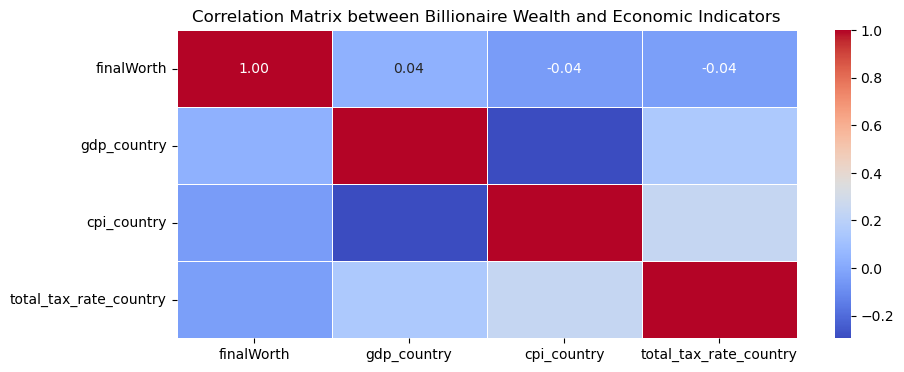

In [174]:
# Select relevant columns for the analysis
economic_indicators = billionaires_statistics_df[['finalWorth', 'gdp_country', 'cpi_country', 'total_tax_rate_country']]

# Convert GDP to numerical by removing commas and casting to float
economic_indicators['gdp_country'] = economic_indicators['gdp_country'].replace('[\$,]', '', regex=True).astype(float)

# Drop any rows with missing values
economic_indicators = economic_indicators.dropna()

# Compute the correlation matrix
correlation_matrix = economic_indicators.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix between Billionaire Wealth and Economic Indicators')
plt.show()

1. Billionaire Wealth (finalWorth):
There is a very weak positive correlation between billionaire wealth and GDP (0.04), indicating that higher GDP does not strongly correlate with higher billionaire wealth.
There is a very weak negative correlation between billionaire wealth and both CPI (-0.04) and total tax rate (-0.04), suggesting that these factors also do not have a strong direct relationship with billionaire wealth.

2. GDP (gdp_country):
GDP has a weak positive correlation with billionaire wealth (0.04), implying that countries with higher GDP might have slightly higher billionaire wealth, but the relationship is not strong.

3. CPI (cpi_country):
CPI shows a very weak negative correlation with billionaire wealth (-0.04), indicating that higher consumer price index levels are slightly associated with lower billionaire wealth, but again, the relationship is weak.

4. Total Tax Rate (total_tax_rate_country):
The total tax rate also has a very weak negative correlation with billionaire wealth (-0.04), suggesting that higher tax rates do not significantly impact the wealth of billionaires.

#### Visualizing the geographical distribution of billionaires and their wealth on a map use available latitude and longitude and use below code for example

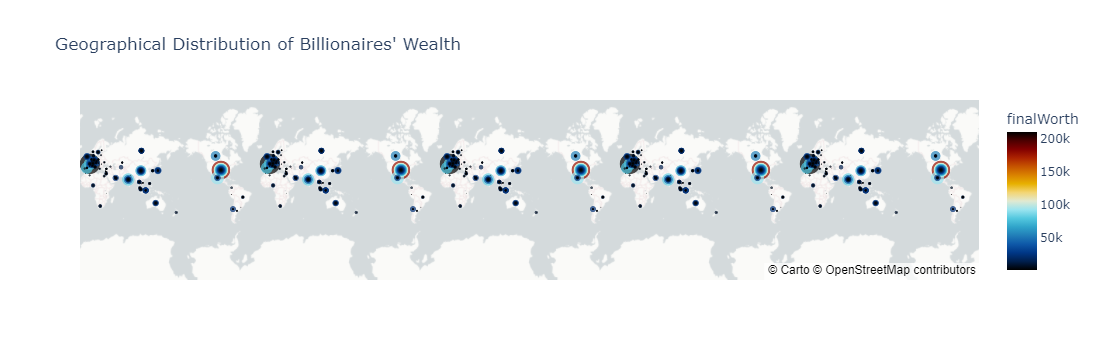

In [175]:
import plotly.express as px

geospatial_analysis_df = billionaires_statistics_df.copy()

# Ensure latitude and longitude columns are not empty
geospatial_analysis_df = geospatial_analysis_df.dropna(subset=['latitude_country', 'longitude_country'])

# Convert finalWorth to float for proper sizing
geospatial_analysis_df['finalWorth'] = geospatial_analysis_df['finalWorth'].astype(float)

# Plot the geographical distribution of billionaires' wealth
fig = px.scatter_mapbox(geospatial_analysis_df, lat='latitude_country', lon='longitude_country', 
                        size='finalWorth', color='finalWorth',
                        color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=1,
                        mapbox_style="carto-positron", title="Geographical Distribution of Billionaires' Wealth")

fig.show()

### Mising value Handling

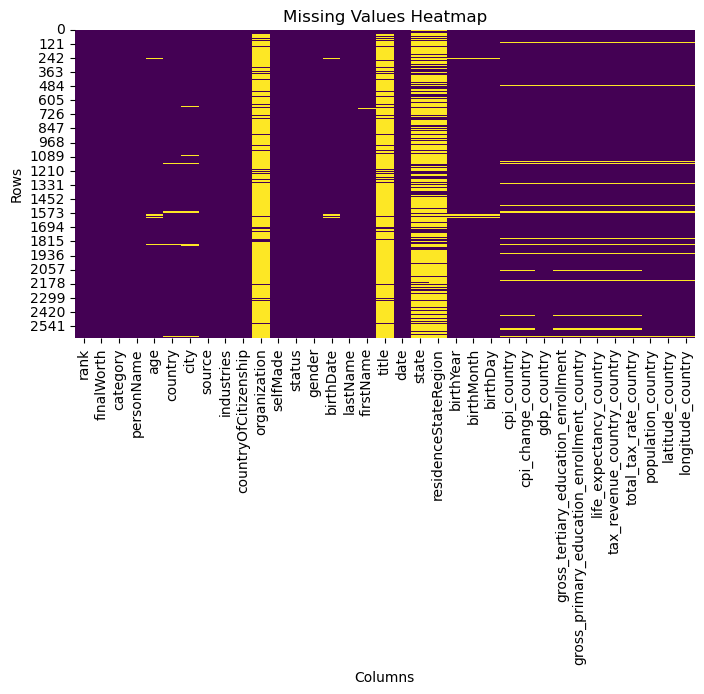

In [199]:

# Plot missing values heatmap
plt.figure(figsize=(8, 4)) # Set the figure size for the plot

# 'cbar=False' hides the color bar
# 'cmap=viridis' sets the colormap to viridis for better visualization
sns.heatmap(billionaires_statistics_df.isnull(), cbar=False, cmap='viridis')

plt.title('Missing Values Heatmap') # Set the title of the plot
plt.xlabel('Columns') # Set the label for the x-axis
plt.ylabel('Rows') # Set the label for the y-axis
plt.show()

##### Before start omitting or imputing the features, let's first create a train and test split

In [177]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets without specifying a target variable
billionaires_statistics_train_data, billionaires_statistics_test_data = train_test_split(billionaires_statistics_df, test_size=0.2, random_state=42)

# 
Dropping below columns:
1. Dropping Organization, title, state, and residenceStateRegion is mostly missing and not required for model prediction
2. Dropping birthDate, birthYear, birthMonth and birthDay because we have age column
3. Dropping firstName and lastName because we already have personName
4. Dropping rank because it has all unique values
5. Dropping date column, when the data is captured is not required for model predcition

In [178]:
# Defining function to drop columns
def drop_columns(df, drop_column_list):
    return df.drop(columns = drop_column_list)

# Columns to drop list
drop_column_list = ['personName', 'organization', 'title', 'state', 'residenceStateRegion',
                    'birthDate', 'firstName', 'lastName', 'rank', 'date',
                   'birthYear', 'birthMonth', 'birthDay']

# Dropping a column for train and test data
billionaires_statistics_train_data = drop_columns(billionaires_statistics_train_data, drop_column_list)
billionaires_statistics_test_data = drop_columns(billionaires_statistics_test_data, drop_column_list)

#### Imputing missing values of Age column

* Age:
The median age is 65 years, and the interquartile range (IQR) is from 56 to 75 years.


In [179]:
# Defining a fucntion to impute missing values for age.
def impute_missing_age_details(df):
    
    # Impute missing 'age' with the median age
    median_age = df['age'].median()
    df['age'].fillna(median_age, inplace=True)
    return df

# Apply the imputation function
billionaires_statistics_train_data = impute_missing_age_details(billionaires_statistics_train_data)
billionaires_statistics_test_data = impute_missing_age_details(billionaires_statistics_test_data)


# Check the result
missing_after_imputation = billionaires_statistics_train_data[['age']].isnull().sum()
print("Missing values after imputation:\n", missing_after_imputation)

Missing values after imputation:
 age    0
dtype: int64


In [180]:
# Checking null values of country
billionaires_statistics_train_data['country'].isnull().sum()

32

In [181]:
# Defining a function to omit missing values

def omit_missing_rows(df,columns):
    return df.dropna(subset=columns)

# Impute 'country' and 'city' using mode
billionaires_statistics_train_data = omit_missing_rows(billionaires_statistics_train_data, ['country', 'city'])
billionaires_statistics_test_data = omit_missing_rows(billionaires_statistics_test_data, ['country', 'city'])

# Check the result
missing_after_imputation = billionaires_statistics_train_data[['country', 'city']].isnull().sum()
print("Missing values after imputation:\n", missing_after_imputation)

Missing values after imputation:
 country    0
city       0
dtype: int64


C:\Users\MIS\AppData\Local\Temp\ipykernel_1440\2311634105.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\MIS\AppData\Local\Temp\ipykernel_1440\2311634105.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



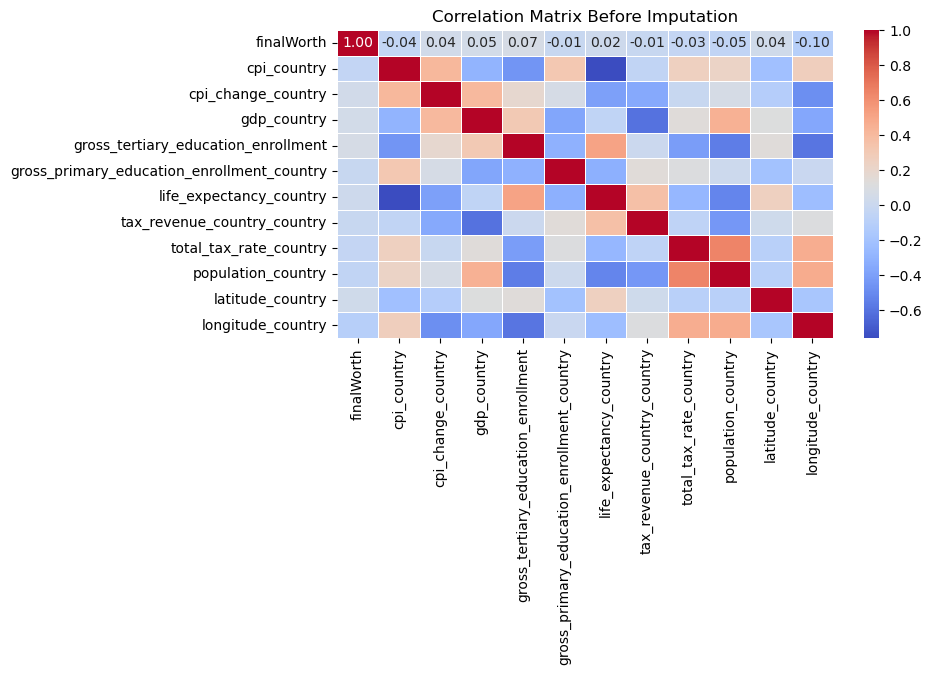

In [182]:
# List of columns to visualize correlations
columns_to_visualize = ['finalWorth', 'cpi_country', 'cpi_change_country', 'gdp_country',
                        'gross_tertiary_education_enrollment', 'gross_primary_education_enrollment_country',
                        'life_expectancy_country', 'tax_revenue_country_country', 'total_tax_rate_country',
                        'population_country', 'latitude_country', 'longitude_country']

# Select the columns from the dataset
data_subset = billionaires_statistics_train_data[columns_to_visualize]

# Clean and convert columns to numeric because gdp_country and population_country contain special symbol
# We are using a regular expression to remove special symbols from string
data_subset['gdp_country'] = data_subset['gdp_country'].replace('[\$,]', '', regex=True).astype(float)
data_subset['population_country'] = data_subset['population_country'].replace('[\$,]', '', regex=True).astype(float)

# Compute the correlation matrix
correlation_matrix = data_subset.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Before Imputation')
plt.show()

<b>Key Insights:</b>
* High Correlation Between Missing Values:
There is a high correlation between missing values in gross_tertiary_education_enrollment and gross_primary_education_enrollment_country. This suggests that if a value is missing in one of these columns, it is likely to be missing in the other as well.
Similar high correlations are observed between latitude_country and longitude_country, indicating that if one geographic coordinate is missing, the other is likely missing too.

* Moderate Correlation Between Some Economic Indicators:
Moderate correlations exist between missing values in cpi_country and cpi_change_country, gdp_country and cpi_country, gdp_country and cpi_change_country. This implies some dependency between these economic indicators.

<b>Implications for Imputation:</b>
* Grouped Imputation:
For highly correlated columns, such as gross_tertiary_education_enrollment and gross_primary_education_enrollment_country, consider using imputation methods that account for this correlation. For example, multivariate imputation methods like Multiple Imputation by Chained Equations (MICE) can be appropriate.

* Pairwise Imputation:
For pairs like latitude_country and longitude_country, where missing values are highly correlated, using paired imputation methods or ensuring that imputation maintains the relationship between these pairs can be beneficial.

* Independent Imputation:
For columns with low correlations in missing values, simpler imputation methods like mean, median, or KNN can be applied independently.

In [183]:
#  defining a function to convert specified columns to numeric types.

def clean_and_convert_columns(data, columns):    
    for column in columns:

        # Clean and convert columns to numeric because gdp_country and population_country contain special symbol
        # We are using a regular expression to remove special symbols from string
        data[column] = data[column].replace('[\$,]', '', regex=True).astype(float)
    return data

# List of columns to be cleaned and converted
columns_to_convert = ['gdp_country', 'population_country']

# Apply the function to clean and convert the specified columns
billionaires_statistics_train_data = clean_and_convert_columns(billionaires_statistics_train_data, columns_to_convert)
billionaires_statistics_test_data = clean_and_convert_columns(billionaires_statistics_test_data, columns_to_convert)

# 
The **IterativeImputer** in Scikit-learn learns function for each feature with missing values based on other features and updates them in the iterative way starting with initial approximations. In turn, it applies regression models iteratively in a round-robin fashion in order to get nearly ‘converged’ imputed values. This method is more flexible as different types of the regression models can be used to deal with intricate relations among the features.

In [184]:
# Define a function to impute highly correlated pairs of columns using Iterative Imputer (similar to MICE).
def impute_highly_correlated_pairs(df, high_corr_pairs):
    # Iterate over each pair of highly correlated columns
    for pair in high_corr_pairs:
        # Initialize the IterativeImputer with max_iter=10 and random_state=0
        imputer = IterativeImputer(max_iter=10, random_state=0)
        
        # Apply the imputer to the pair of columns and update the DataFrame
        df[pair] = imputer.fit_transform(df[pair])
    
    # Return the DataFrame with imputed values
    return df

# List of highly correlated pairs of columns
high_corr_pairs = [
    ['gross_tertiary_education_enrollment', 'gross_primary_education_enrollment_country'],
    ['latitude_country', 'longitude_country']
]

# Apply the function to impute highly correlated pairs in the training data
billionaires_statistics_train_data = impute_highly_correlated_pairs(billionaires_statistics_train_data, high_corr_pairs)

# Apply the function to impute highly correlated pairs in the test data
billionaires_statistics_test_data = impute_highly_correlated_pairs(billionaires_statistics_test_data, high_corr_pairs)

Using the **KNNImputer** in Scikit-learn, missing values are imputed based on k nearest neighbors, in which each missing value of the feature is imputed according to the mean (or other statistics) of other samples’ corresponding features. This method stands the chance of capturing the local data distribution This test is most suitable when the missing data is random. There exists a mechanism of how to choose a right number of neighbors (k) from which one can avoid both bias and high variance of the imputed values.

In [185]:
# Define a function to impute missing values for continuous columns using KNN imputer
def impute_continuous_columns_knn(df, continuous_columns, n_neighbors=5):
    # Initialize the KNNImputer with the specified number of neighbors
    knn_imputer = KNNImputer(n_neighbors=n_neighbors)
    
    # Apply the KNN imputer to the continuous columns and update the DataFrame
    df[continuous_columns] = knn_imputer.fit_transform(df[continuous_columns])
    return df

# List of continuous columns to be imputed
continuous_columns = [
    'cpi_country', 'cpi_change_country', 'gdp_country',
    'life_expectancy_country', 'tax_revenue_country_country', 'total_tax_rate_country',
    'population_country'
]

# Apply the function to impute continuous columns in the training data using KNN imputer
billionaires_statistics_train_data = impute_continuous_columns_knn(billionaires_statistics_train_data, continuous_columns, n_neighbors=5)

# Apply the function to impute continuous columns in the test data using KNN imputer
billionaires_statistics_test_data = impute_continuous_columns_knn(billionaires_statistics_test_data, continuous_columns, n_neighbors=5)

In [186]:
### Checking categorical columns with similar values: category, industries
print("Categories: ", billionaires_statistics_train_data['category'].unique())
print("Industries: ", billionaires_statistics_train_data['industries'].unique())

Categories:  ['Finance & Investments' 'Real Estate' 'Fashion & Retail'
 'Food & Beverage' 'Manufacturing' 'Technology' 'Media & Entertainment'
 'Metals & Mining' 'Service' 'Energy' 'Healthcare' 'Diversified'
 'Gambling & Casinos' 'Logistics' 'Construction & Engineering'
 'Automotive' 'Telecom' 'Sports']
Industries:  ['Finance & Investments' 'Real Estate' 'Fashion & Retail'
 'Food & Beverage' 'Manufacturing' 'Technology' 'Media & Entertainment'
 'Metals & Mining' 'Service' 'Energy' 'Healthcare' 'Diversified'
 'Gambling & Casinos' 'Logistics' 'Construction & Engineering'
 'Automotive' 'Telecom' 'Sports']


In [187]:
# Since categories and Industries have same values, will drop one of them
billionaires_statistics_train_data.drop(columns = 'industries', inplace = True)
billionaires_statistics_test_data.drop(columns = 'industries', inplace = True)

### Outliers detection

In [188]:
def identify_outliers_zscore(data, threshold=3):
    """
    Identify outliers in a DataFrame using the Z-score method.
    
    Parameters:
    data (pd.DataFrame): The dataset to check for outliers.
    threshold (float): The Z-score threshold to identify outliers.
    
    Returns:
    pd.DataFrame: A DataFrame indicating the outliers with boolean values.
    """
    z_scores = np.abs(zscore(data, nan_policy='omit'))
    return (z_scores > threshold)

def plot_boxplots(data, columns):
    """
    Plot box plots for specified columns to visualize outliers.
    
    Parameters:
    data (pd.DataFrame): The dataset containing the columns to plot.
    columns (list): List of column names to plot.
    """
    plt.figure(figsize=(15, 10))
    for i, column in enumerate(columns, 1):
        plt.subplot(len(columns)//2 + 1, 2, i)
        sns.boxplot(x=data[column])
        plt.title(f'Box plot of {column}')
    plt.tight_layout()
    plt.show()

Number of outliers in each column:
 finalWorth                                    30
cpi_country                                   29
cpi_change_country                            19
gdp_country                                    0
gross_tertiary_education_enrollment            3
gross_primary_education_enrollment_country    25
life_expectancy_country                        7
tax_revenue_country_country                    8
total_tax_rate_country                         3
population_country                             0
age                                            4
dtype: int64


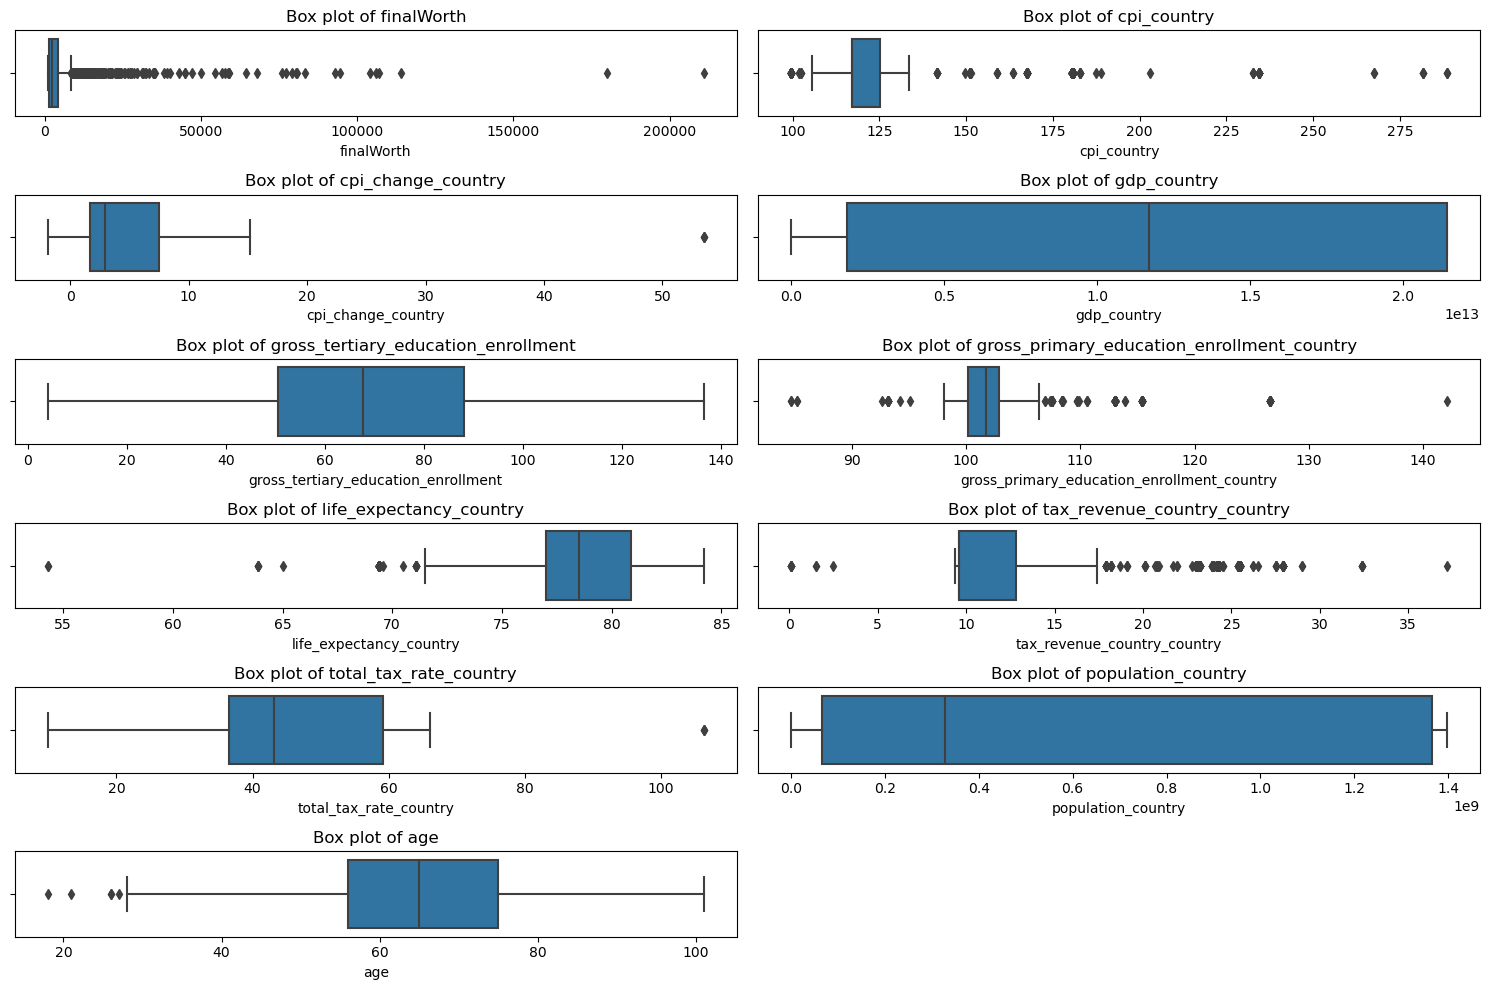

In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# List all columns that need cleaning and conversion
columns_to_convert = ['finalWorth', 'cpi_country', 'cpi_change_country', 'gdp_country',
                      'gross_tertiary_education_enrollment', 'gross_primary_education_enrollment_country',
                      'life_expectancy_country', 'tax_revenue_country_country', 'total_tax_rate_country',
                      'population_country', 'age']


# Identify outliers using the Z-score method for the entire dataset
outliers = identify_outliers_zscore(billionaires_statistics_train_data[columns_to_convert])

# Print the number of outliers in each column
outliers_summary = outliers.sum(axis=0)  # Sum along the columns to get the number of outliers per column
print("Number of outliers in each column:\n", outliers_summary)

# Plot box plots to visualize outliers
plot_boxplots(billionaires_statistics_train_data, columns_to_convert)

In [190]:
# Defining a function to cap outliers in a DataFrame using the IQR method.
# Define a function to cap outliers using the IQR method
def cap_outliers_iqr(df, columns):
    # Iterate over each column specified in the list
    for column in columns:
        # Calculate the first quartile (Q1) of the column
        Q1 = df[column].quantile(0.25)
        
        # Calculate the third quartile (Q3) of the column
        Q3 = df[column].quantile(0.75)
        
        # Calculate the Interquartile Range (IQR)
        IQR = Q3 - Q1
        
        # Calculate the lower bound for outliers
        lower_bound = Q1 - 1.5 * IQR
        
        # Calculate the upper bound for outliers
        upper_bound = Q3 + 1.5 * IQR
        
        # Cap values below the lower bound to the lower bound value
        df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
        
        # Cap values above the upper bound to the upper bound value
        df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    
    return df

In [191]:
# Cap outliers using the IQR method
billionaires_statistics_train_data = cap_outliers_iqr(billionaires_statistics_train_data, columns_to_convert)

### Model Prepation for selfMade prediction

In [192]:
# Create copies of the train and test datasets to work on
self_made_prediction_model_train_df = billionaires_statistics_train_data.copy()
self_made_prediction_model_test_df = billionaires_statistics_test_data.copy()

# Identify numerical features in the dataset
numerical_features = self_made_prediction_model_train_df.select_dtypes(include=np.number).columns.values
print("Numerical Features:")
print(numerical_features)

# Identify categorical features to be one-hot encoded
categorical_features = ['category', 'country', 'countryOfCitizenship', 'status', 'gender']
print("\nCategorical Features:")
print(categorical_features)

# Identify features to be label encoded
label_encoder_features = ['city', 'source']
print("\nLabel Encoder Features:")
print(label_encoder_features)

# Separate features (X) and target variable (y) for training and test datasets
X_train = self_made_prediction_model_train_df.drop(columns=['selfMade'])
y_train = self_made_prediction_model_train_df['selfMade']
X_test = self_made_prediction_model_test_df.drop(columns=['selfMade'])
y_test = self_made_prediction_model_test_df['selfMade']

# Create a transformer to normalize/scale numerical data, and encode categorical data
transformer = make_column_transformer(
    (StandardScaler(), numerical_features),  # Normalize numerical features
    (OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), label_encoder_features),  # Label encode certain features
    (OneHotEncoder(handle_unknown='ignore'), categorical_features),  # One-hot encode remaining categorical features
    remainder='passthrough'  # Leave other columns unchanged
)

# Apply the transformations to the training and test datasets
transformed_X_train = transformer.fit_transform(X_train).toarray()
transformed_X_test = transformer.transform(X_test).toarray()

# Retrieve the feature names after transformation
feature_names = transformer.get_feature_names_out()

# Ensure the transformed data's shape matches the number of feature names
assert transformed_X_train.shape[1] == len(feature_names), "Mismatch between transformed X_train shape and feature names length"
assert transformed_X_test.shape[1] == len(feature_names), "Mismatch between transformed X_test shape and feature names length"

# Create DataFrames with the transformed data
X_train_transformed = pd.DataFrame(transformed_X_train, columns=feature_names)
X_test_transformed = pd.DataFrame(transformed_X_test, columns=feature_names)

# Split the transformed training data into training and validation sets
X_train_final, X_val, y_train_final, y_val = train_test_split(X_train_transformed, y_train, test_size=0.2, random_state=42)

Numerical Features:
['finalWorth' 'age' 'cpi_country' 'cpi_change_country' 'gdp_country'
 'gross_tertiary_education_enrollment'
 'gross_primary_education_enrollment_country' 'life_expectancy_country'
 'tax_revenue_country_country' 'total_tax_rate_country'
 'population_country' 'latitude_country' 'longitude_country']

Categorical Features:
['category', 'country', 'countryOfCitizenship', 'status', 'gender']

Label Encoder Features:
['city', 'source']


### Model fitting for selfMade prediction

In [193]:
# Define a function to train and evaluate multiple models
def train_and_evaluate_models(X_train, y_train, X_val, y_val):
    # Dictionary to store different classifier models
    models = {
        "Decision Tree": DecisionTreeClassifier(random_state=42),
        "Random Forest": RandomForestClassifier(random_state=42),
        "Gradient Boosting": GradientBoostingClassifier(random_state=42),
        "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
    }

    # Dictionary to store validation predictions for each model
    y_preds_val = {}

    # Iterate over each model, fit it, and evaluate it
    for name, model in models.items():
        # Train the model on the training data
        model.fit(X_train, y_train)
        
        # Predict the labels for the validation data
        y_preds_val[name] = model.predict(X_val)
        
        # Print the name of the classifier
        print(f"{name} Classifier")
        
        # Print the accuracy of the model on the validation data
        print("Accuracy:", accuracy_score(y_val, y_preds_val[name]))
        
        # Print the classification report for the model
        print(classification_report(y_val, y_preds_val[name]))
    
    # Return the dictionary containing validation predictions for each model
    return y_preds_val

# Train and evaluate the models
y_preds_val = train_and_evaluate_models(X_train_final, y_train_final, X_val, y_val)

Decision Tree Classifier
Accuracy: 0.7712895377128953
              precision    recall  f1-score   support

       False       0.60      0.69      0.64       121
        True       0.86      0.81      0.83       290

    accuracy                           0.77       411
   macro avg       0.73      0.75      0.74       411
weighted avg       0.78      0.77      0.78       411

Random Forest Classifier
Accuracy: 0.8126520681265207
              precision    recall  f1-score   support

       False       0.71      0.62      0.66       121
        True       0.85      0.89      0.87       290

    accuracy                           0.81       411
   macro avg       0.78      0.76      0.77       411
weighted avg       0.81      0.81      0.81       411

Gradient Boosting Classifier
Accuracy: 0.781021897810219
              precision    recall  f1-score   support

       False       0.65      0.55      0.59       121
        True       0.82      0.88      0.85       290

    accuracy     

C:\Users\MIS\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning:

[13:14:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




XGBoost Classifier
Accuracy: 0.8004866180048662
              precision    recall  f1-score   support

       False       0.67      0.64      0.66       121
        True       0.85      0.87      0.86       290

    accuracy                           0.80       411
   macro avg       0.76      0.76      0.76       411
weighted avg       0.80      0.80      0.80       411



### Model testing on test set for selfMade prediction

In [203]:

# Define a function to plot accuracy comparison of different models
def plot_accuracy_comparison(model_names, accuracies):
    plt.figure(figsize=(6, 2)) # Set the figure size for the plot
    
    # Create a bar plot to compare accuracies of different models
    sns.barplot(x=model_names, y=accuracies) 
    plt.title('Model Accuracy Comparison') # Set the title of the plot
    plt.xlabel('Models') # Set the label for the x-axis
    plt.ylabel('Accuracy') # Set the label for the y-axis
    plt.ylim(0, 1) # Set the limit for the y-axis to range from 0 to 1
    plt.show()

# Define a function to plot confusion matrix for model predictions
def plot_confusion_matrix(y_true, y_pred, title):
    
    # Compute the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Create a confusion matrix display object
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    
    # Plot the confusion matrix with a specified color map
    disp.plot(cmap='Blues')
    plt.title(title)
    plt.show()

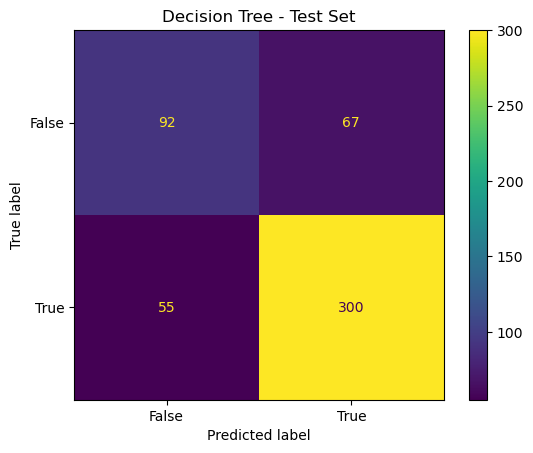

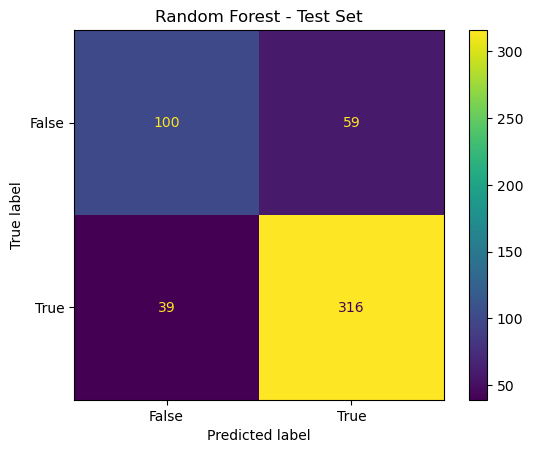

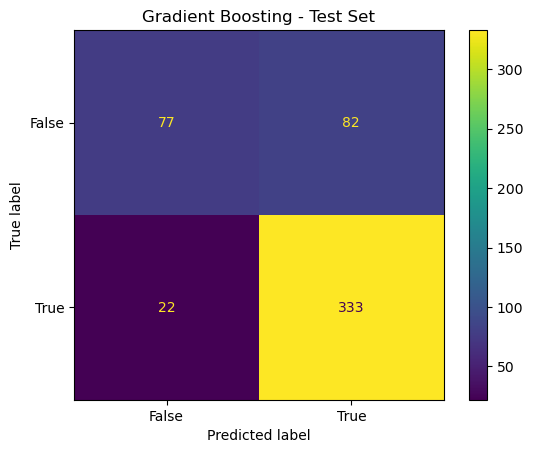

C:\Users\MIS\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning:

[13:51:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




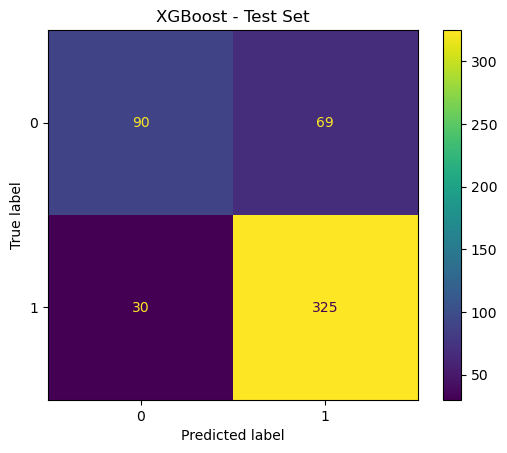

Test accuracies: [0.7626459143968871, 0.8093385214007782, 0.7976653696498055, 0.8073929961089494]


In [204]:
# Define a function to evaluate models on the test dataset
def evaluate_on_test(X_test, y_test):
    # Dictionary to store different classifier models
    models = {
        "Decision Tree": DecisionTreeClassifier(random_state=42),
        "Random Forest": RandomForestClassifier(random_state=42),
        "Gradient Boosting": GradientBoostingClassifier(random_state=42),
        "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
    }
    
    # Dictionary to store test predictions for each model
    y_preds_test = {}
    
    # List to store accuracy scores for each model
    accuracies_test = []
    
    # Iterate over each model, fit it, and evaluate it on the test dataset
    for name, model in models.items():
        # Train the model on the entire training data
        model.fit(X_train_final, y_train_final)
        
        # Predict the labels for the test data
        y_preds_test[name] = model.predict(X_test)
        
        # Calculate and store the accuracy of the model on the test data
        accuracies_test.append(accuracy_score(y_test, y_preds_test[name]))
        
        # Compute the confusion matrix for the model's predictions
        cm = confusion_matrix(y_test, y_preds_test[name])
        
        # Create and plot the confusion matrix display
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
        disp.plot()
        plt.title(f'{name} - Test Set')  # Set the title of the plot
        plt.show()
        
    # Return the dictionary containing test predictions and the list of accuracy scores
    return y_preds_test, accuracies_test

# Evaluate models on the test data
y_preds_test, accuracies_test = evaluate_on_test(X_test_transformed, y_test)

# Print the test accuracies for each model
print("Test accuracies:", accuracies_test)

### Model visulaisation for selfMade prediction

Validation Set Accuracy Comparison:


C:\Users\MIS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning:

unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.



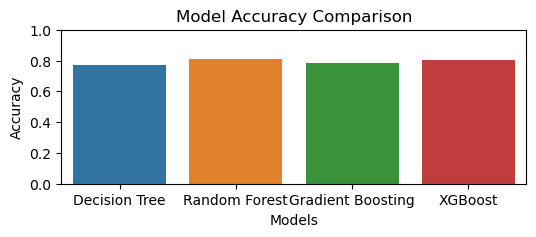

Test Set Accuracy Comparison:


C:\Users\MIS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning:

unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.



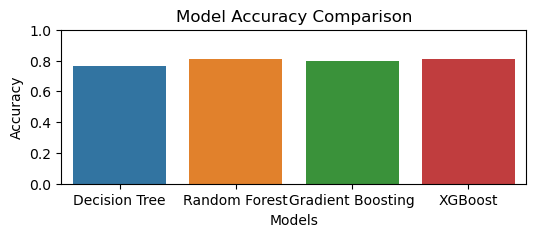

Confusion Matrices for Test Set:


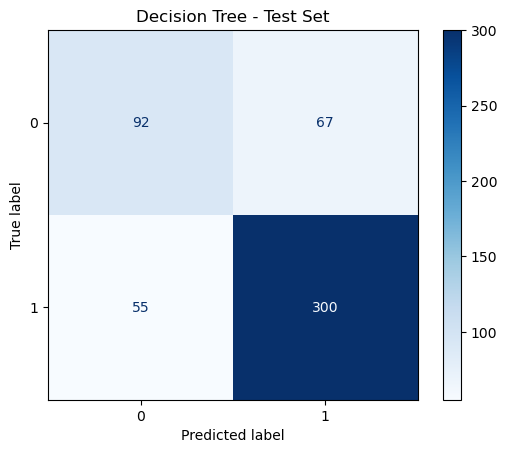

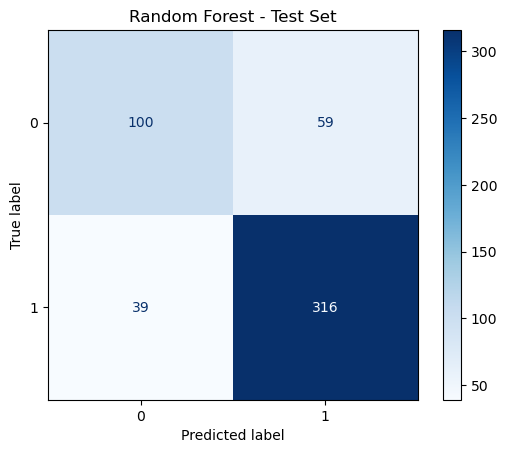

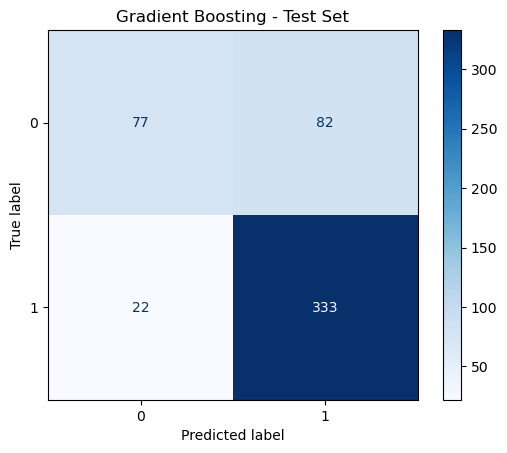

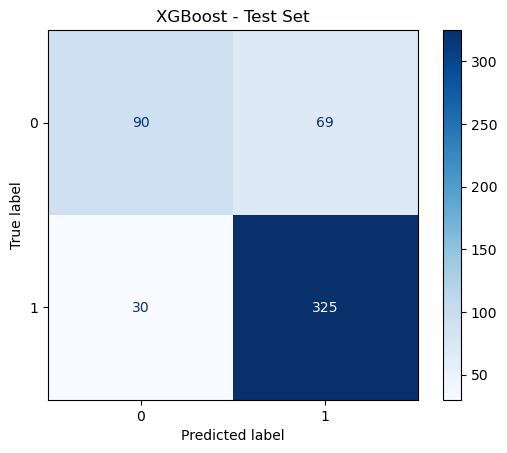

In [205]:
# Import necessary libraries
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Collect accuracy scores for the validation set
model_names = ['Decision Tree', 'Random Forest', 'Gradient Boosting', 'XGBoost']
accuracies_val = [
    accuracy_score(y_val, y_preds_val['Decision Tree']),
    accuracy_score(y_val, y_preds_val['Random Forest']),
    accuracy_score(y_val, y_preds_val['Gradient Boosting']),
    accuracy_score(y_val, y_preds_val['XGBoost'])
]

# Plot accuracy comparison for the validation set
print("Validation Set Accuracy Comparison:")
plot_accuracy_comparison(model_names, accuracies_val)

# Plot accuracy comparison for the test set
print("Test Set Accuracy Comparison:")
plot_accuracy_comparison(model_names, accuracies_test)

# Plot confusion matrices for the test set for each model
print("Confusion Matrices for Test Set:")
plot_confusion_matrix(y_test, y_preds_test['Decision Tree'], 'Decision Tree - Test Set')
plot_confusion_matrix(y_test, y_preds_test['Random Forest'], 'Random Forest - Test Set')
plot_confusion_matrix(y_test, y_preds_test['Gradient Boosting'], 'Gradient Boosting - Test Set')
plot_confusion_matrix(y_test, y_preds_test['XGBoost'], 'XGBoost - Test Set')

### Utilization of Analysis Result

* Model Selection:
The bar chart showing model accuracy comparison helps in selecting the best-performing model for predicting selfMade. For instance, if the Random Forest classifier has the highest accuracy, it should be selected for deployment.

* Performance Insight:
The accuracy scores and classification reports provide detailed insights into each model's performance, including precision, recall, and F1-score for both classes (selfMade and not selfMade). This information helps understand the strengths and weaknesses of each model and guides further improvements.

* Model Improvement:
Confusion matrices help identify specific instances where the models are struggling. For example, if the model often misclassifies not selfMade as selfMade, further tuning or data augmentation for the not selfMade class may be necessary.

* Decision Making:
Stakeholders can use this analysis to make informed decisions about which machine learning model to deploy in production. The visualizations facilitate better decision-making by providing a clear comparison of model performance.

# Semi Supervised Learning

Semi-Supervised Learning with LabelSpreading - Validation Set
Accuracy: 0.7055961070559611
              precision    recall  f1-score   support

       False       0.00      0.00      0.00       121
        True       0.71      1.00      0.83       290

    accuracy                           0.71       411
   macro avg       0.35      0.50      0.41       411
weighted avg       0.50      0.71      0.58       411



C:\Users\MIS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\MIS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\MIS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



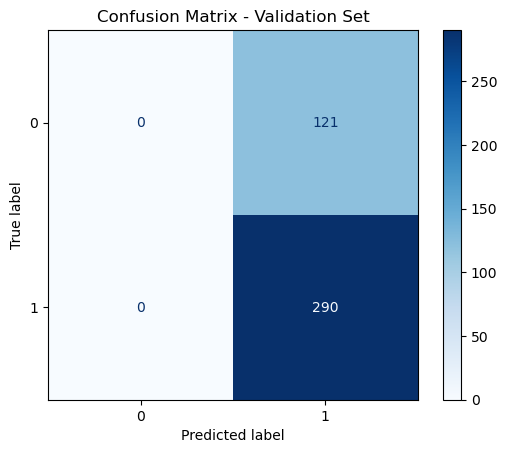

In [197]:
# For semi-supervised learning, we will use a subset of labeled data and unlabeled data
n_labeled_points = int(0.1 * len(X_train_final))  # Use 10% of the data as labeled
unlabeled_indices = np.arange(n_labeled_points, len(X_train_final))

y_train_semi_supervised = np.copy(y_train_final)
y_train_semi_supervised[unlabeled_indices] = -1  # Mark unlabeled data with -1

# Apply LabelSpreading for semi-supervised learning
label_spreading = LabelSpreading(kernel='knn', n_neighbors=7)
label_spreading.fit(X_train_final, y_train_semi_supervised)

# Predictions on the validation set
y_pred_val = label_spreading.predict(X_val)

# Evaluate the model on the validation set
print("Semi-Supervised Learning with LabelSpreading - Validation Set")
print("Accuracy:", accuracy_score(y_val, y_pred_val))
print(classification_report(y_val, y_pred_val))

# Plot confusion matrix for validation set
cm = confusion_matrix(y_val, y_pred_val)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - Validation Set')
plt.show()

#### Testing with test data

Semi-Supervised Learning with LabelSpreading - Validation Set
Accuracy: 0.7055961070559611
              precision    recall  f1-score   support

       False       0.00      0.00      0.00       121
        True       0.71      1.00      0.83       290

    accuracy                           0.71       411
   macro avg       0.35      0.50      0.41       411
weighted avg       0.50      0.71      0.58       411



C:\Users\MIS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\MIS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\MIS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



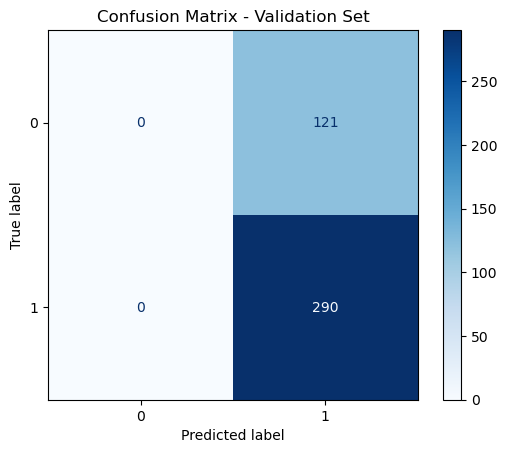

In [198]:

# Define the number of labeled points for semi-supervised learning (10% of the training data)
n_labeled_points = int(0.1 * len(X_train_final))

# Generate indices for the unlabeled data (from 10% to the end of the training data)
unlabeled_indices = np.arange(n_labeled_points, len(X_train_final))

# Create a copy of the training labels to modify for semi-supervised learning
y_train_semi_supervised = np.copy(y_train_final)

# Mark the unlabeled data points with -1
y_train_semi_supervised[unlabeled_indices] = -1

# Apply LabelSpreading for semi-supervised learning with a k-nearest neighbors kernel
label_spreading = LabelSpreading(kernel='knn', n_neighbors=7)

# Fit the LabelSpreading model to the training data with semi-supervised labels
label_spreading.fit(X_train_final, y_train_semi_supervised)

# Predict the labels for the validation set
y_pred_val = label_spreading.predict(X_val)

# Evaluate the model on the validation set
print("Semi-Supervised Learning with LabelSpreading - Validation Set")
print("Accuracy:", accuracy_score(y_val, y_pred_val))
print(classification_report(y_val, y_pred_val))

# Compute and plot the confusion matrix for the validation set
cm = confusion_matrix(y_val, y_pred_val)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - Validation Set')
plt.show()

#### Utilization of analysis result

<b>Model Evaluation</b>

* Overall Accuracy:

The overall accuracy of 71% indicates that the model correctly classifies 71% of the instances in the test set. This is a reasonable starting point, but the specifics of precision, recall, and f1-score should be considered for a more nuanced understanding.

* Class-Specific Performance:

True Class (Positive):
Precision: 0.71
Recall: 1.00
F1-Score: 0.83

False Class (Negative):
Precision: 0.00
Recall: 0.00
F1-Score: 0.00
The model performs well in predicting the 'True' class, with a recall of 1.00, meaning it captures all positive instances. However, it fails to predict the 'False' class entirely, leading to a precision and recall of 0.00 for that class.

<b> Actionable Insights </b>

* Address Class Imbalance:
The performance disparity between the 'True' and 'False' classes suggests a class imbalance issue. Implementing techniques like oversampling the minority class (False) or undersampling the majority class (True) could help balance the dataset and improve performance.

* Improve False Class Prediction:
The model's inability to predict the 'False' class indicates a need for feature engineering, better data preprocessing, or perhaps incorporating additional relevant features that can help differentiate between the classes.